## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
laptop = pd.read_csv('./data/laptop-to-predict.csv')
laptop.head()

,Inches,Ram,Weight,Price_euros,screen_width,screen_height,IPS Panel,CPU GHz,MemoryAmount,CPU_Intel,...,OpSys_Chrome OS,OpSys_Linux,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 7,OpSys_macOS,CPU Brand_Intel,MemoryType_HDD,MemoryType_Hybrid,MemoryType_SSD
0,13.3,8,1.37,1339.69,2560,1600,1,2.3,128,1,...,0,0,0,0,0,1,1,0,0,1
1,13.3,8,1.34,898.94,1440,900,0,1.8,128,1,...,0,0,0,0,0,1,1,0,0,0
2,15.6,8,1.86,575.00,1920,1080,0,2.5,256,1,...,0,0,1,0,0,0,1,0,0,1
3,15.4,16,1.83,2537.45,2880,1800,1,2.7,512,1,...,0,0,0,0,0,1,1,0,0,1
4,13.3,8,1.37,1803.60,2560,1600,1,3.1,256,1,...,0,0,0,0,0,1,1,0,0,1


In [5]:
laptop.dtypes

Inches                  float64
Ram                       int64
Weight                  float64
Price_euros             float64
screen_width              int64
screen_height             int64
IPS Panel                 int64
CPU GHz                 float64
MemoryAmount              int64
CPU_Intel                 int64
Company_Apple             int64
Company_Asus              int64
Company_Dell              int64
Company_HP                int64
Company_Lenovo            int64
Company_MSI               int64
Company_Other             int64
Company_Toshiba           int64
TypeName_Gaming           int64
TypeName_Netbook          int64
TypeName_Notebook         int64
TypeName_Ultrabook        int64
TypeName_Workstation      int64
Gpu_Intel                 int64
Gpu_Nvidia                int64
OpSys_Chrome OS           int64
OpSys_Linux               int64
OpSys_No OS               int64
OpSys_Windows 10          int64
OpSys_Windows 7           int64
OpSys_macOS               int64
CPU Bran

## Turn datatypes into booleans 

In [8]:
laptop.columns[9:]

Index(['CPU_Intel', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Other',
       'Company_Toshiba', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Gpu_Intel', 'Gpu_Nvidia', 'OpSys_Chrome OS', 'OpSys_Linux',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 7', 'OpSys_macOS',
       'CPU Brand_Intel', 'MemoryType_HDD', 'MemoryType_Hybrid',
       'MemoryType_SSD'],
      dtype='object')

In [9]:
bools = laptop.columns[9:]
def datatypes(df):
    for bool in bools:
        df[bool] = df[bool].astype('bool')

In [11]:
datatypes(laptop)

In [12]:
laptop.dtypes

Inches                  float64
Ram                       int64
Weight                  float64
Price_euros             float64
screen_width              int64
screen_height             int64
IPS Panel                 int64
CPU GHz                 float64
MemoryAmount              int64
CPU_Intel                  bool
Company_Apple              bool
Company_Asus               bool
Company_Dell               bool
Company_HP                 bool
Company_Lenovo             bool
Company_MSI                bool
Company_Other              bool
Company_Toshiba            bool
TypeName_Gaming            bool
TypeName_Netbook           bool
TypeName_Notebook          bool
TypeName_Ultrabook         bool
TypeName_Workstation       bool
Gpu_Intel                  bool
Gpu_Nvidia                 bool
OpSys_Chrome OS            bool
OpSys_Linux                bool
OpSys_No OS                bool
OpSys_Windows 10           bool
OpSys_Windows 7            bool
OpSys_macOS                bool
CPU Bran

In [21]:
laptop.corr()['Price_euros'].sort_values()

TypeName_Notebook      -0.550182
MemoryType_HDD         -0.426584
Gpu_Intel              -0.184894
OpSys_No OS            -0.177246
OpSys_Linux            -0.162204
MemoryAmount           -0.123038
OpSys_Chrome OS        -0.117342
TypeName_Netbook       -0.097660
Company_HP             -0.041566
MemoryType_Hybrid      -0.039438
Company_Lenovo         -0.029293
Company_Asus           -0.010568
Company_Toshiba         0.040246
Company_Dell            0.048245
Inches                  0.067329
Company_Other           0.078537
OpSys_macOS             0.080636
Company_Apple           0.080636
OpSys_Windows 10        0.141929
OpSys_Windows 7         0.152312
Company_MSI             0.180027
CPU_Intel               0.180259
CPU Brand_Intel         0.180259
Weight                  0.209867
TypeName_Workstation    0.249719
IPS Panel               0.253320
TypeName_Ultrabook      0.255504
Gpu_Nvidia              0.348576
TypeName_Gaming         0.375659
CPU GHz                 0.430122
MemoryType

In [34]:
Selected_target = list((laptop.corr()['Price_euros'].sort_values()[0:7] + laptop.corr()['Price_euros'].sort_values()[-20:]).index)

In [37]:
df = laptop[Selected_target]
df

,CPU Brand_Intel,CPU GHz,CPU_Intel,Company_Apple,Company_MSI,Company_Other,Gpu_Intel,Gpu_Nvidia,IPS Panel,MemoryAmount,...,OpSys_macOS,Price_euros,Ram,TypeName_Gaming,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Weight,screen_height,screen_width
0,True,2.3,True,True,False,False,True,False,1,128,...,True,1339.69,8,False,False,True,False,1.37,1600,2560
1,True,1.8,True,True,False,False,True,False,0,128,...,True,898.94,8,False,False,True,False,1.34,900,1440
2,True,2.5,True,False,False,False,True,False,0,256,...,False,575.00,8,False,True,False,False,1.86,1080,1920
3,True,2.7,True,True,False,False,False,False,1,512,...,True,2537.45,16,False,False,True,False,1.83,1800,2880
4,True,3.1,True,True,False,False,True,False,1,256,...,True,1803.60,8,False,False,True,False,1.37,1600,2560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,True,2.5,True,False,False,False,True,False,1,128,...,False,638.00,4,False,False,False,False,1.80,1080,1920
1298,True,2.5,True,False,False,False,True,False,1,512,...,False,1499.00,16,False,False,False,False,1.30,1800,3200
1299,True,1.6,True,False,False,False,True,False,0,64,...,False,229.00,2,False,True,False,False,1.50,768,1366
1300,True,2.5,True,False,False,False,False,False,0,1000,...,False,764.00,6,False,True,False,False,2.19,768,1366


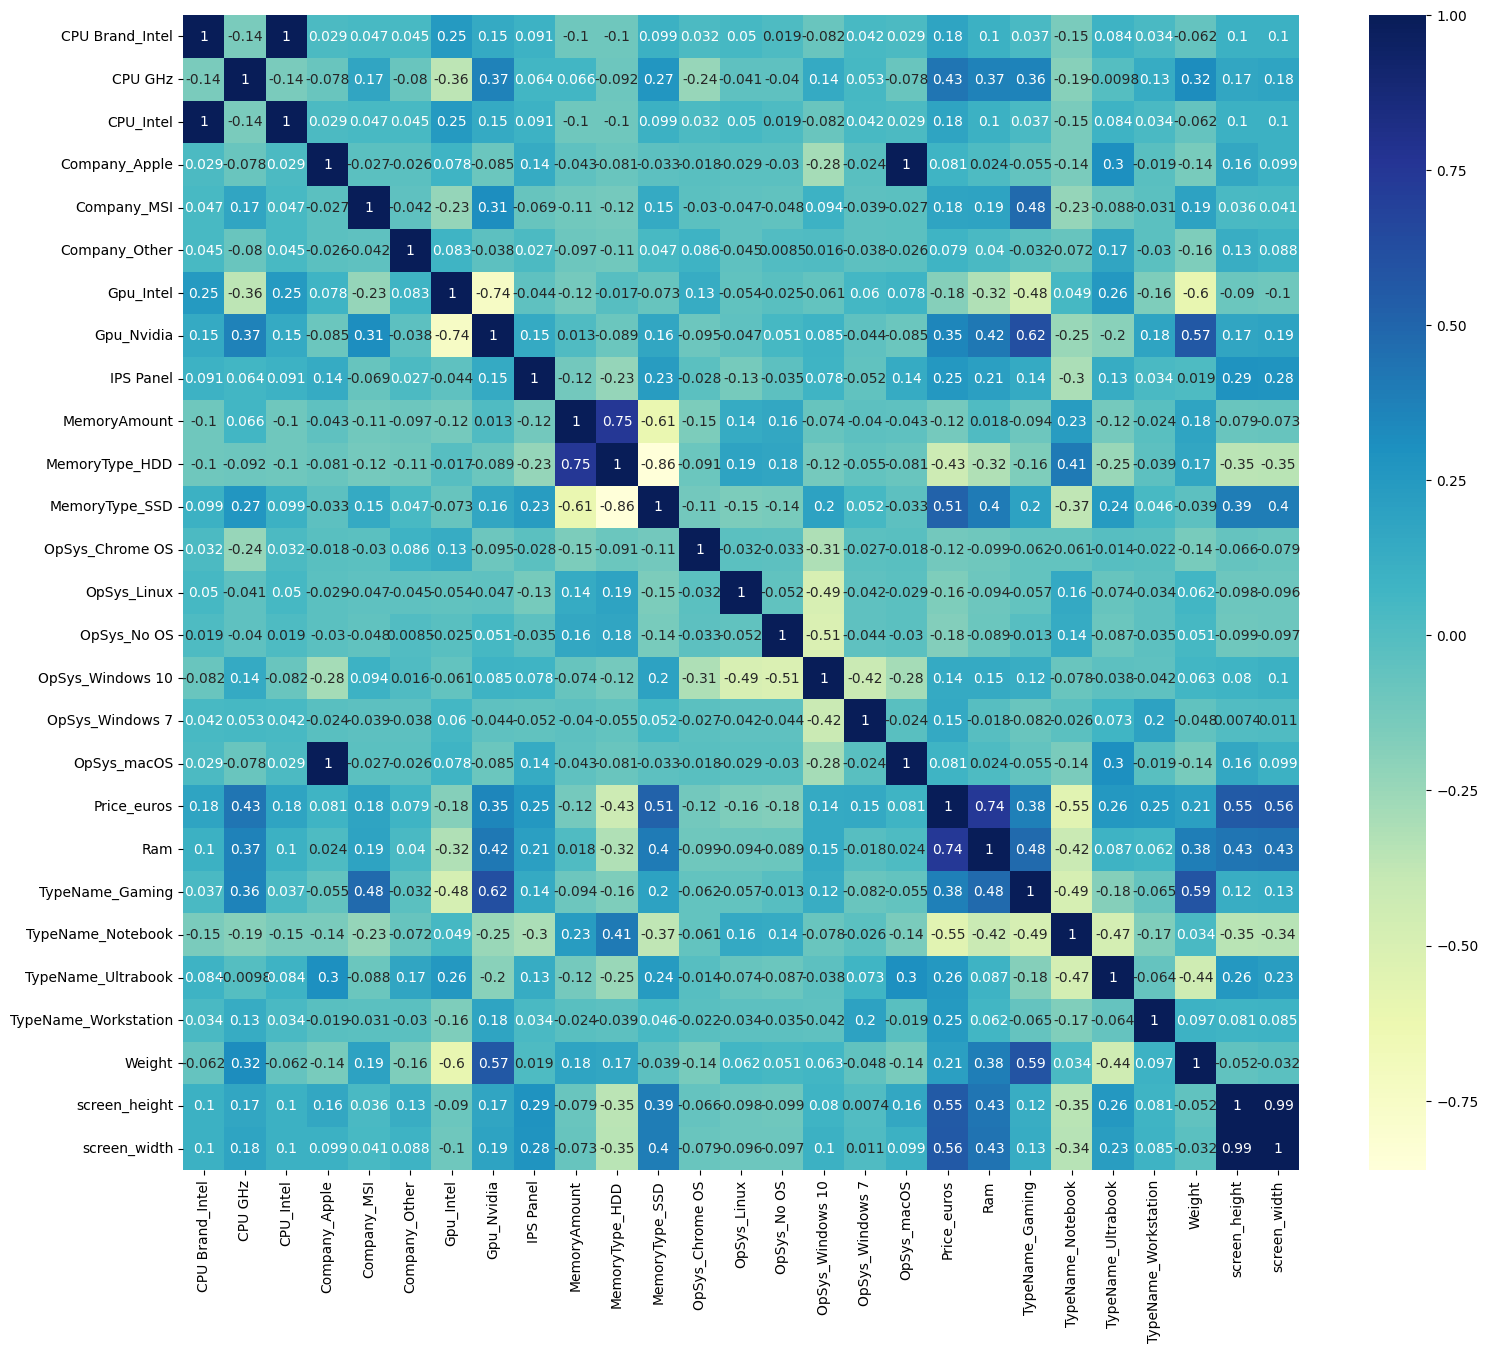

In [42]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

## Model

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [47]:
X,y = df.drop('Price_euros',axis=1),df['Price_euros']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

scaler = StandardScaler()

In [53]:
X,y = laptop.drop('Price_euros',axis=1),laptop['Price_euros']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

scaler = StandardScaler()

In [54]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [55]:
forest = RandomForestRegressor(random_state=36)

forest.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [56]:
forest.score(X_test_scaled,y_test)

0.7982545944973221

In [57]:
y_pred = forest.predict(X_test_scaled)

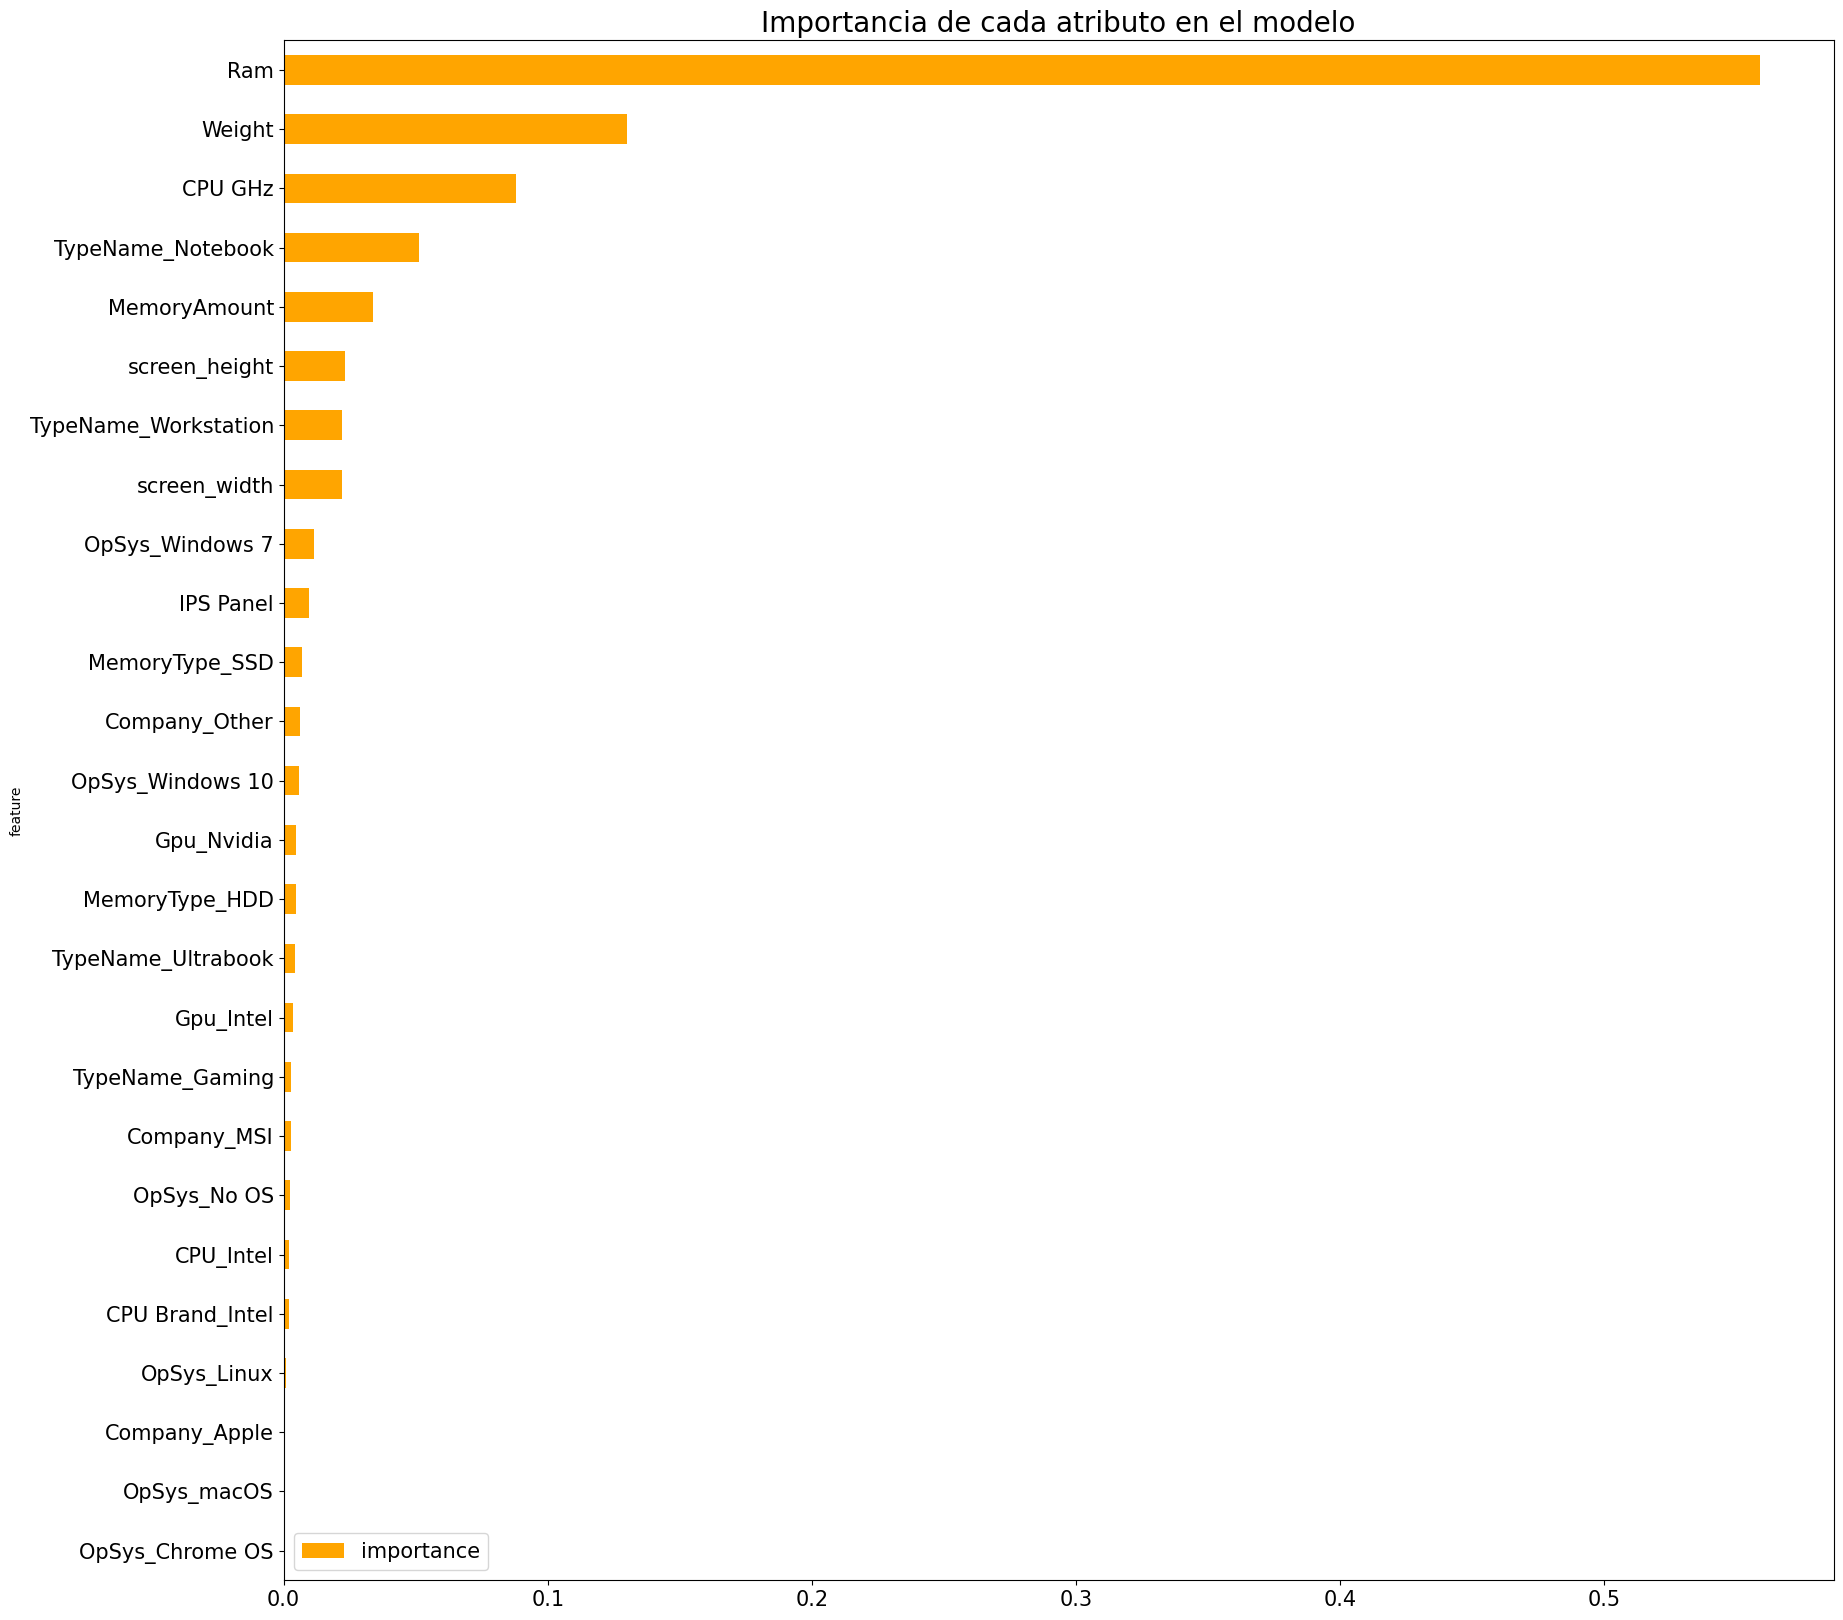

In [52]:
X_train=pd.DataFrame(X_train)
X_train.head()
features = pd.DataFrame()

features['feature'] = X_train.columns

features['importance'] = forest.feature_importances_

features.sort_values(by=['importance'], ascending=True, inplace=True)

features.set_index('feature', inplace=True)


# Para verlo de forma gráfica:
features.plot(kind='barh', figsize=(20, 20),color='orange',fontsize=15)
plt.title('Importancia de cada atributo en el modelo',fontsize=20)
plt.legend(fontsize=15)
plt.show()

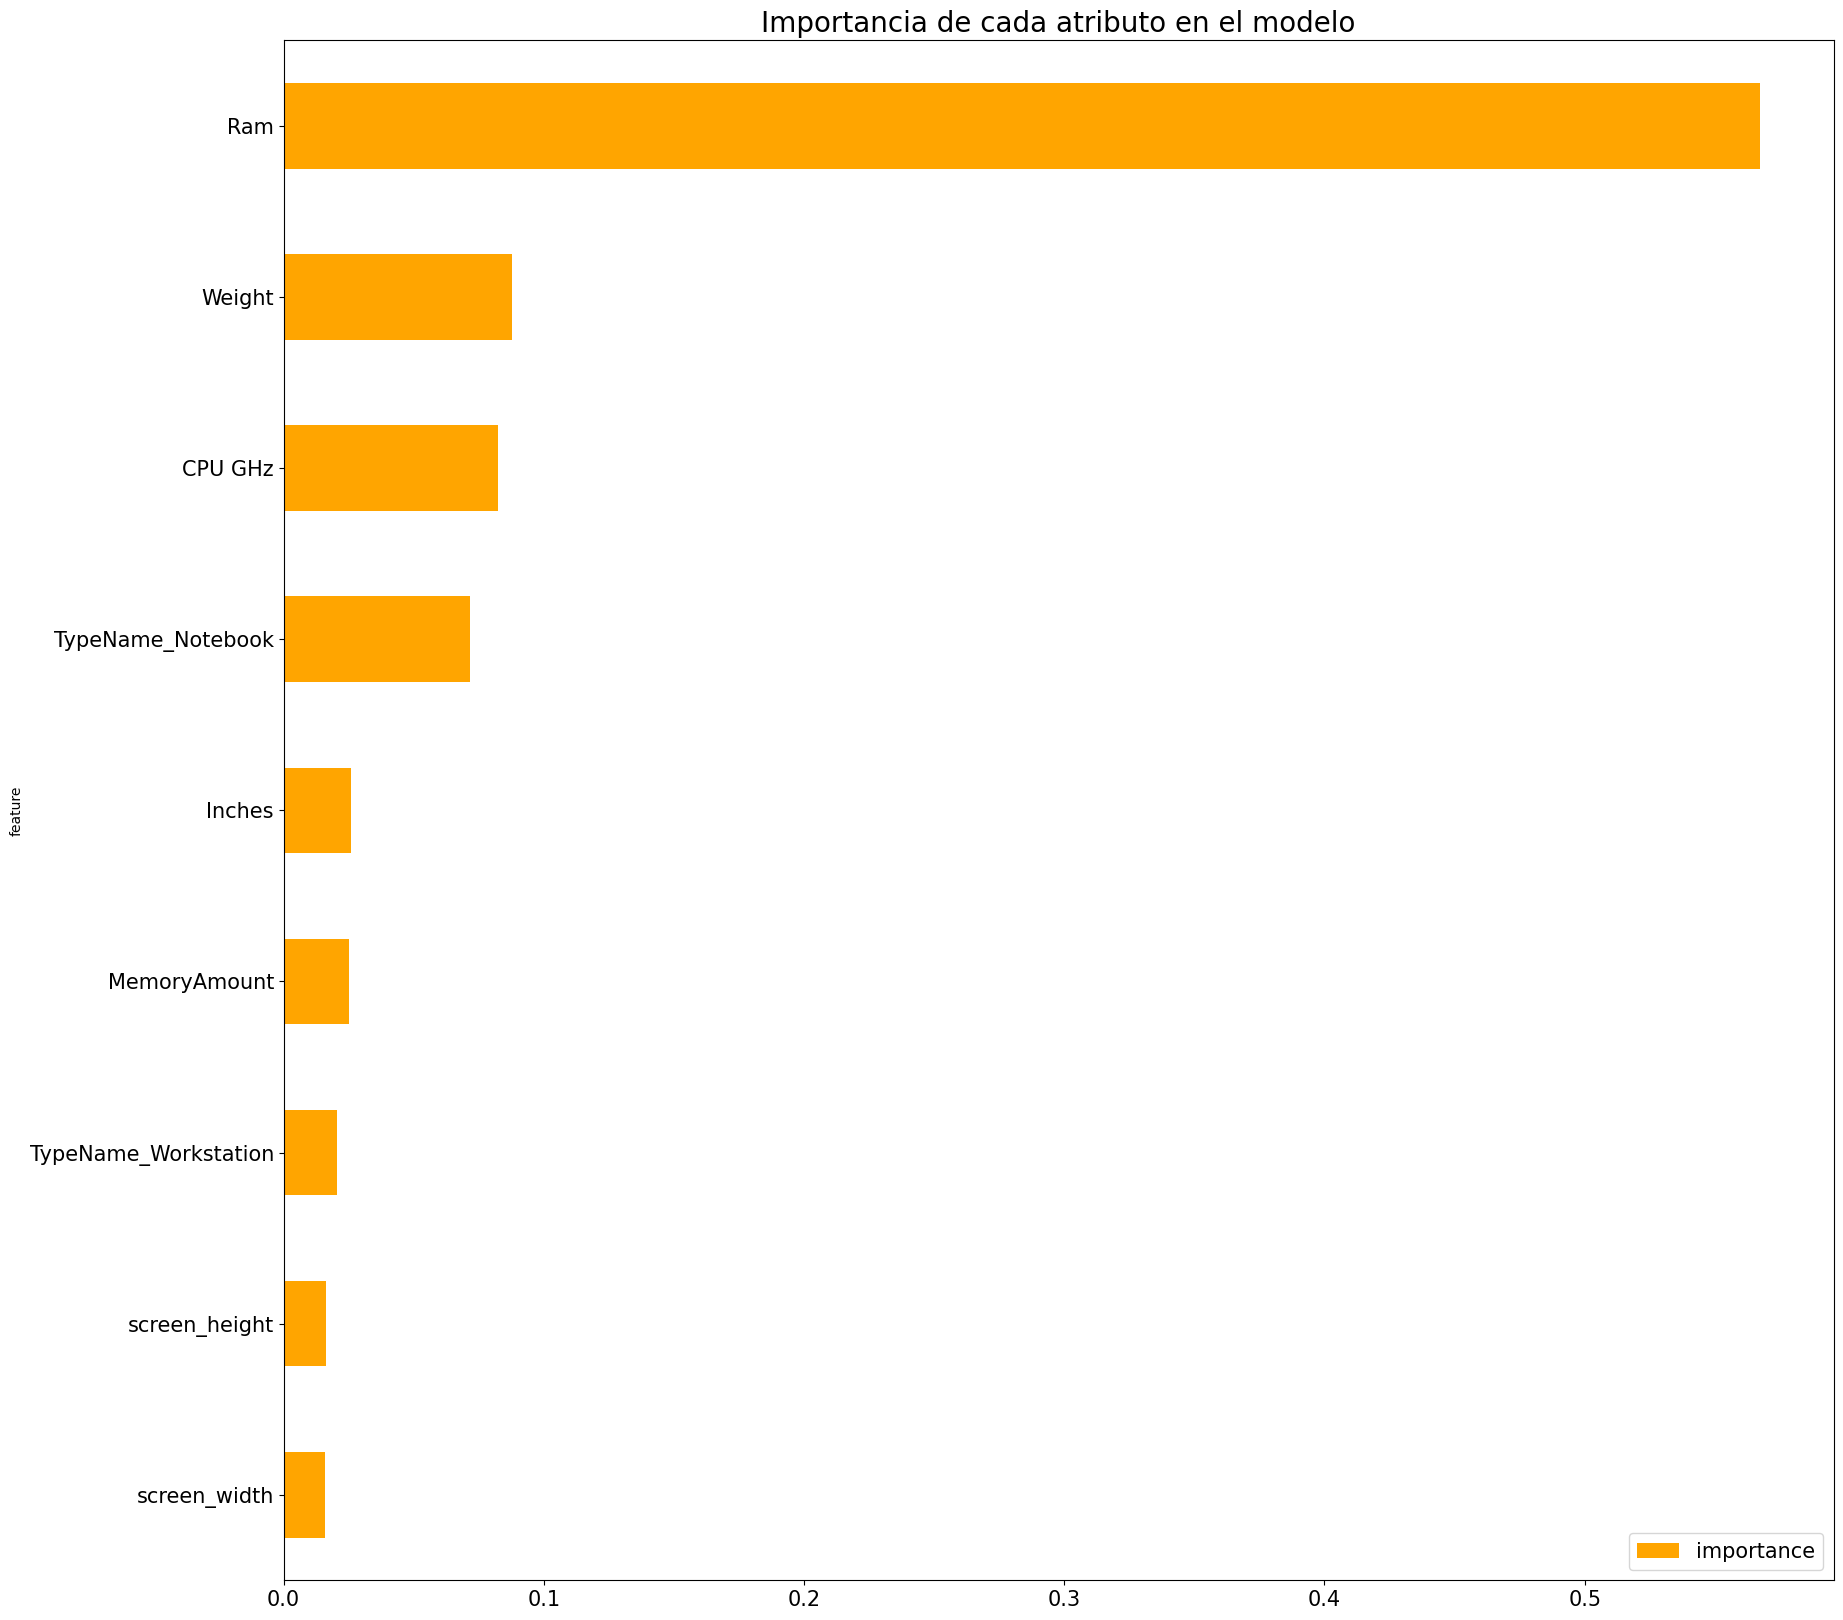

In [60]:
X_train=pd.DataFrame(X_train)

features = pd.DataFrame()

features['feature'] = X_train.columns

features['importance'] = forest.feature_importances_

features.sort_values(by=['importance'], ascending=True, inplace=True)

features.set_index('feature', inplace=True)


# Para verlo de forma gráfica:
features[25:].plot(kind='barh', figsize=(20, 20),color='orange',fontsize=15)
plt.title('Importancia de cada atributo en el modelo',fontsize=20)
plt.legend(fontsize=15)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


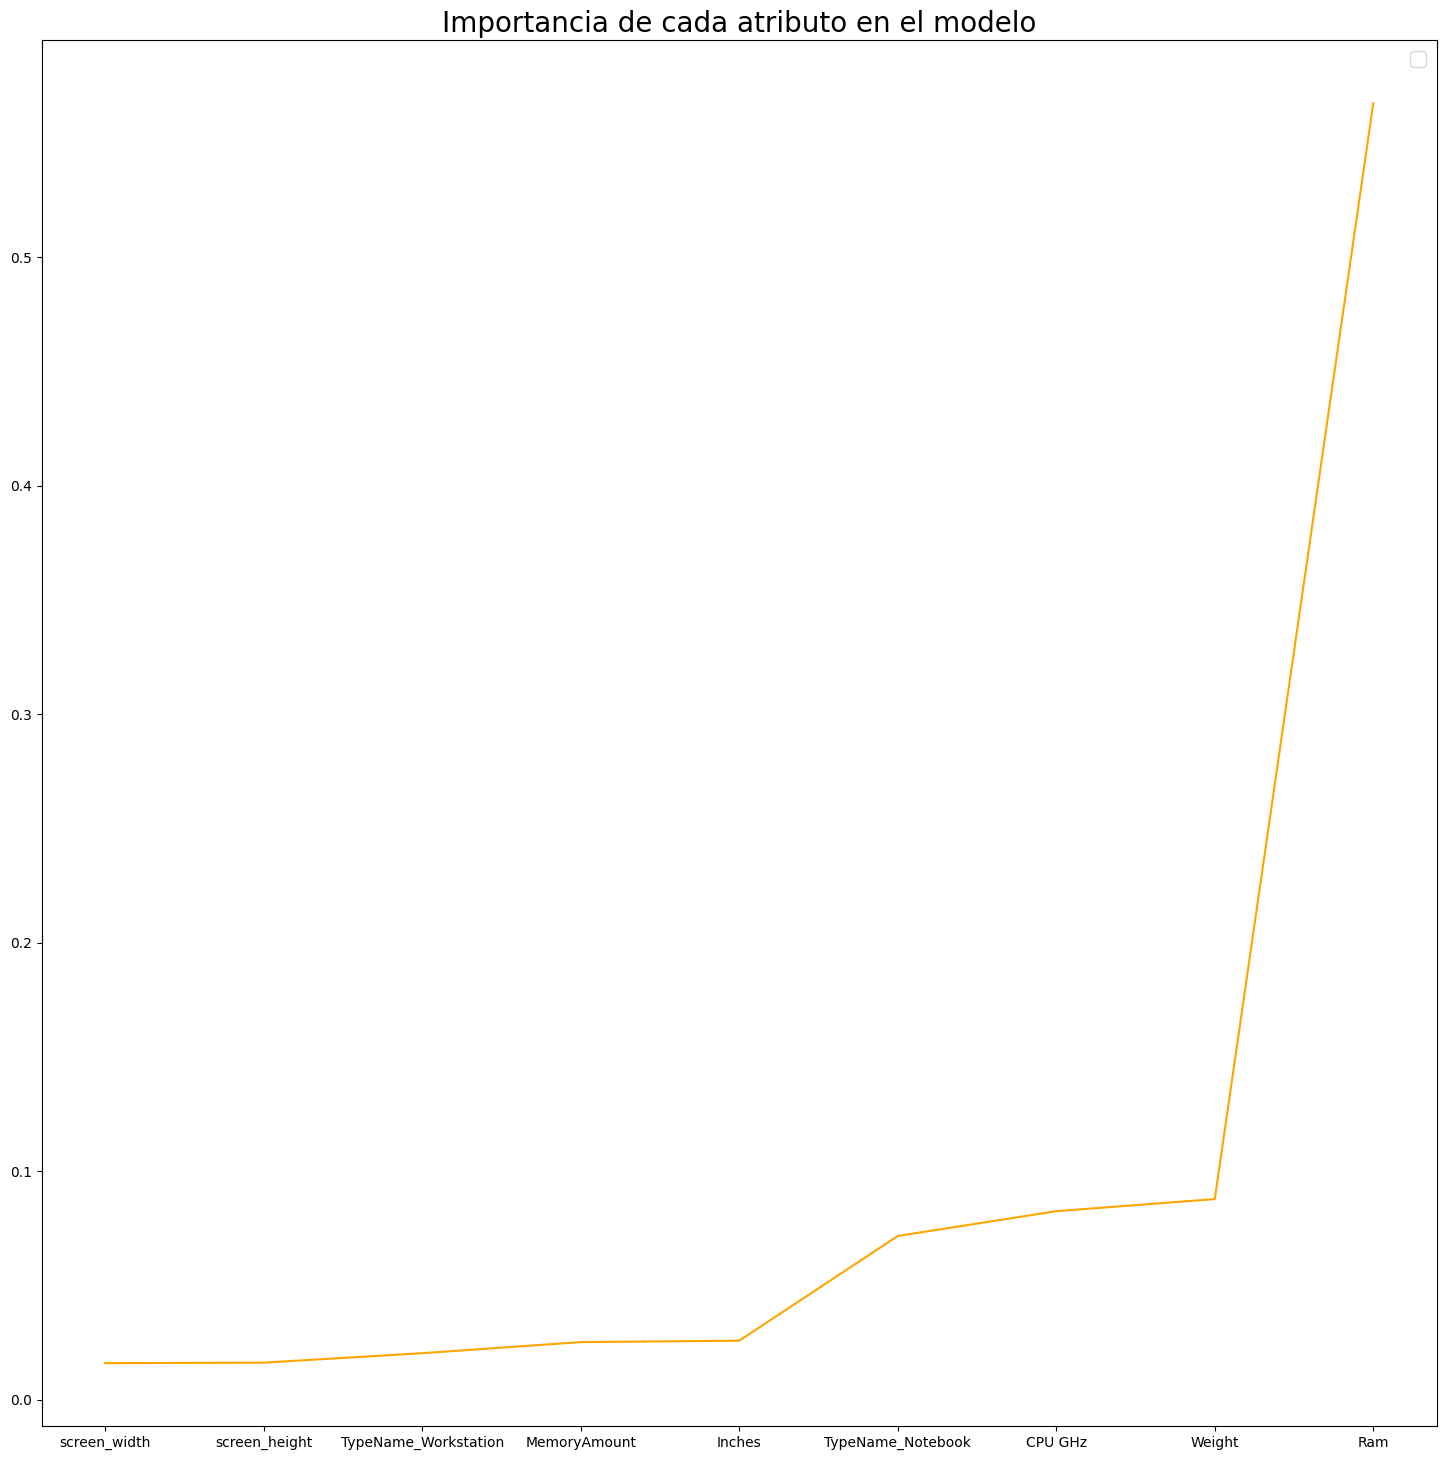

In [70]:
X_train=pd.DataFrame(X_train)
X_train.head()
features = pd.DataFrame()

features['feature'] = X_train.columns

features['importance'] = forest.feature_importances_

features.sort_values(by=['importance'], ascending=True, inplace=True)

features.set_index('feature', inplace=True)


# Para verlo de forma gráfica:
plt.figure(figsize=(18,18))
#sns.barplot(data=features)
plt.plot(features[25:],color='orange')
plt.title('Importancia de cada atributo en el modelo',fontsize=20)
plt.legend(fontsize=15)
plt.show()

## Hiper Parameter Tunning

In [78]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# The function to measure the quality of a split.
criterion=['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
# Maximum number of levels in tree
max_depth = [2,4,5]
# Minimum number of samples required to split a node
min_samples_split = [2,3,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the param grid
param_grid = {
            'n_estimators': n_estimators,
            'criterion': criterion,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}

#Stating the Grid Search

forest_grid = GridSearchCV(forest, param_grid, cv = 5, n_jobs = -1, scoring = 'precision')

#Entrenamos con los datos de entreno...
forest_grid.fit(X_train_scaled,y_train)

#Pintamos los resultados:
print("Best parameters: ")
print(forest_grid.best_params_)
# print()
# print("Scores: ")
# print(DT_grid.cv_results_['mean_test_score'])

In [ ]:
#Check Accuracy
print (f'Train Accuracy - : {forest_grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {forest_grid.score(X_test,y_test):.3f}')